In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

warnings.filterwarnings("ignore")
training_features_path = '/content/drive/My Drive/Colab Notebooks/training_set_features.csv'
training_labels_path = '/content/drive/My Drive/Colab Notebooks/training_set_labels.csv'

train_data = pd.read_csv(training_features_path)
train_labels = pd.read_csv(training_labels_path)

#train_data = pd.read_csv("training_set_features.csv")
#train_labels = pd.read_csv("training_set_labels.csv")

***Preprocessing & Visualization***

In [ ]:
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
train_data


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
train_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [ ]:
train_data.shape

(26707, 36)

In [ ]:
train_data.nunique()

,0
respondent_id,26707
h1n1_concern,4
h1n1_knowledge,3
behavioral_antiviral_meds,2
behavioral_avoidance,2
behavioral_face_mask,2
behavioral_wash_hands,2
behavioral_large_gatherings,2
behavioral_outside_home,2
behavioral_touch_face,2


In [ ]:
train_data[train_data.duplicated()] # tekrarlanan satır yok

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation


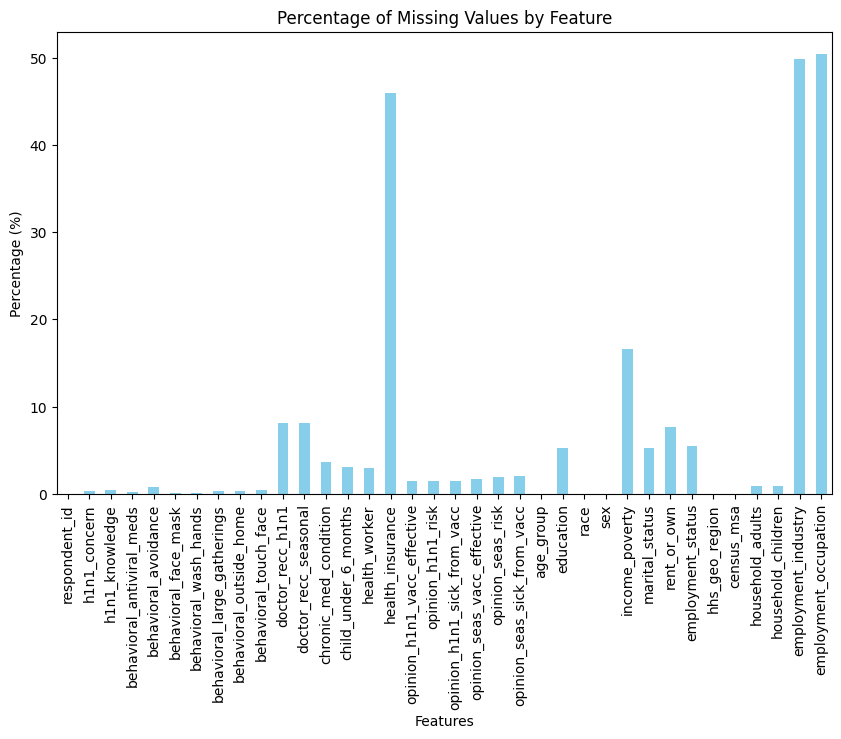

In [ ]:
missing_percentage = train_data.isna().sum() / train_data.shape[0] * 100 #null değerlerin yüzdesi

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

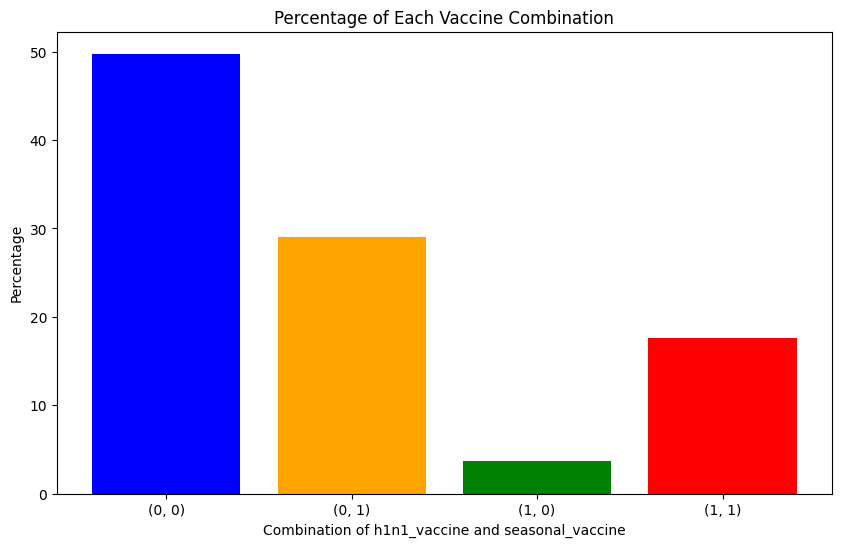

In [ ]:
combination_counts = train_labels.groupby(['h1n1_vaccine', 'seasonal_vaccine']).size().reset_index(name='count')

total_records = len(train_labels)

combination_counts['percentage'] = (combination_counts['count'] / total_records) * 100

plt.figure(figsize=(10, 6))
plt.bar(combination_counts.index, combination_counts['percentage'], color=['blue', 'orange', 'green', 'red'])
plt.xticks(combination_counts.index, combination_counts[['h1n1_vaccine', 'seasonal_vaccine']].apply(tuple, axis=1))
plt.xlabel('Combination of h1n1_vaccine and seasonal_vaccine')
plt.ylabel('Percentage')
plt.title('Percentage of Each Vaccine Combination')
plt.show()

In [ ]:
numeric_cols = ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults', 'household_children']

categorical_features =['age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'employment_industry',
       'employment_occupation']

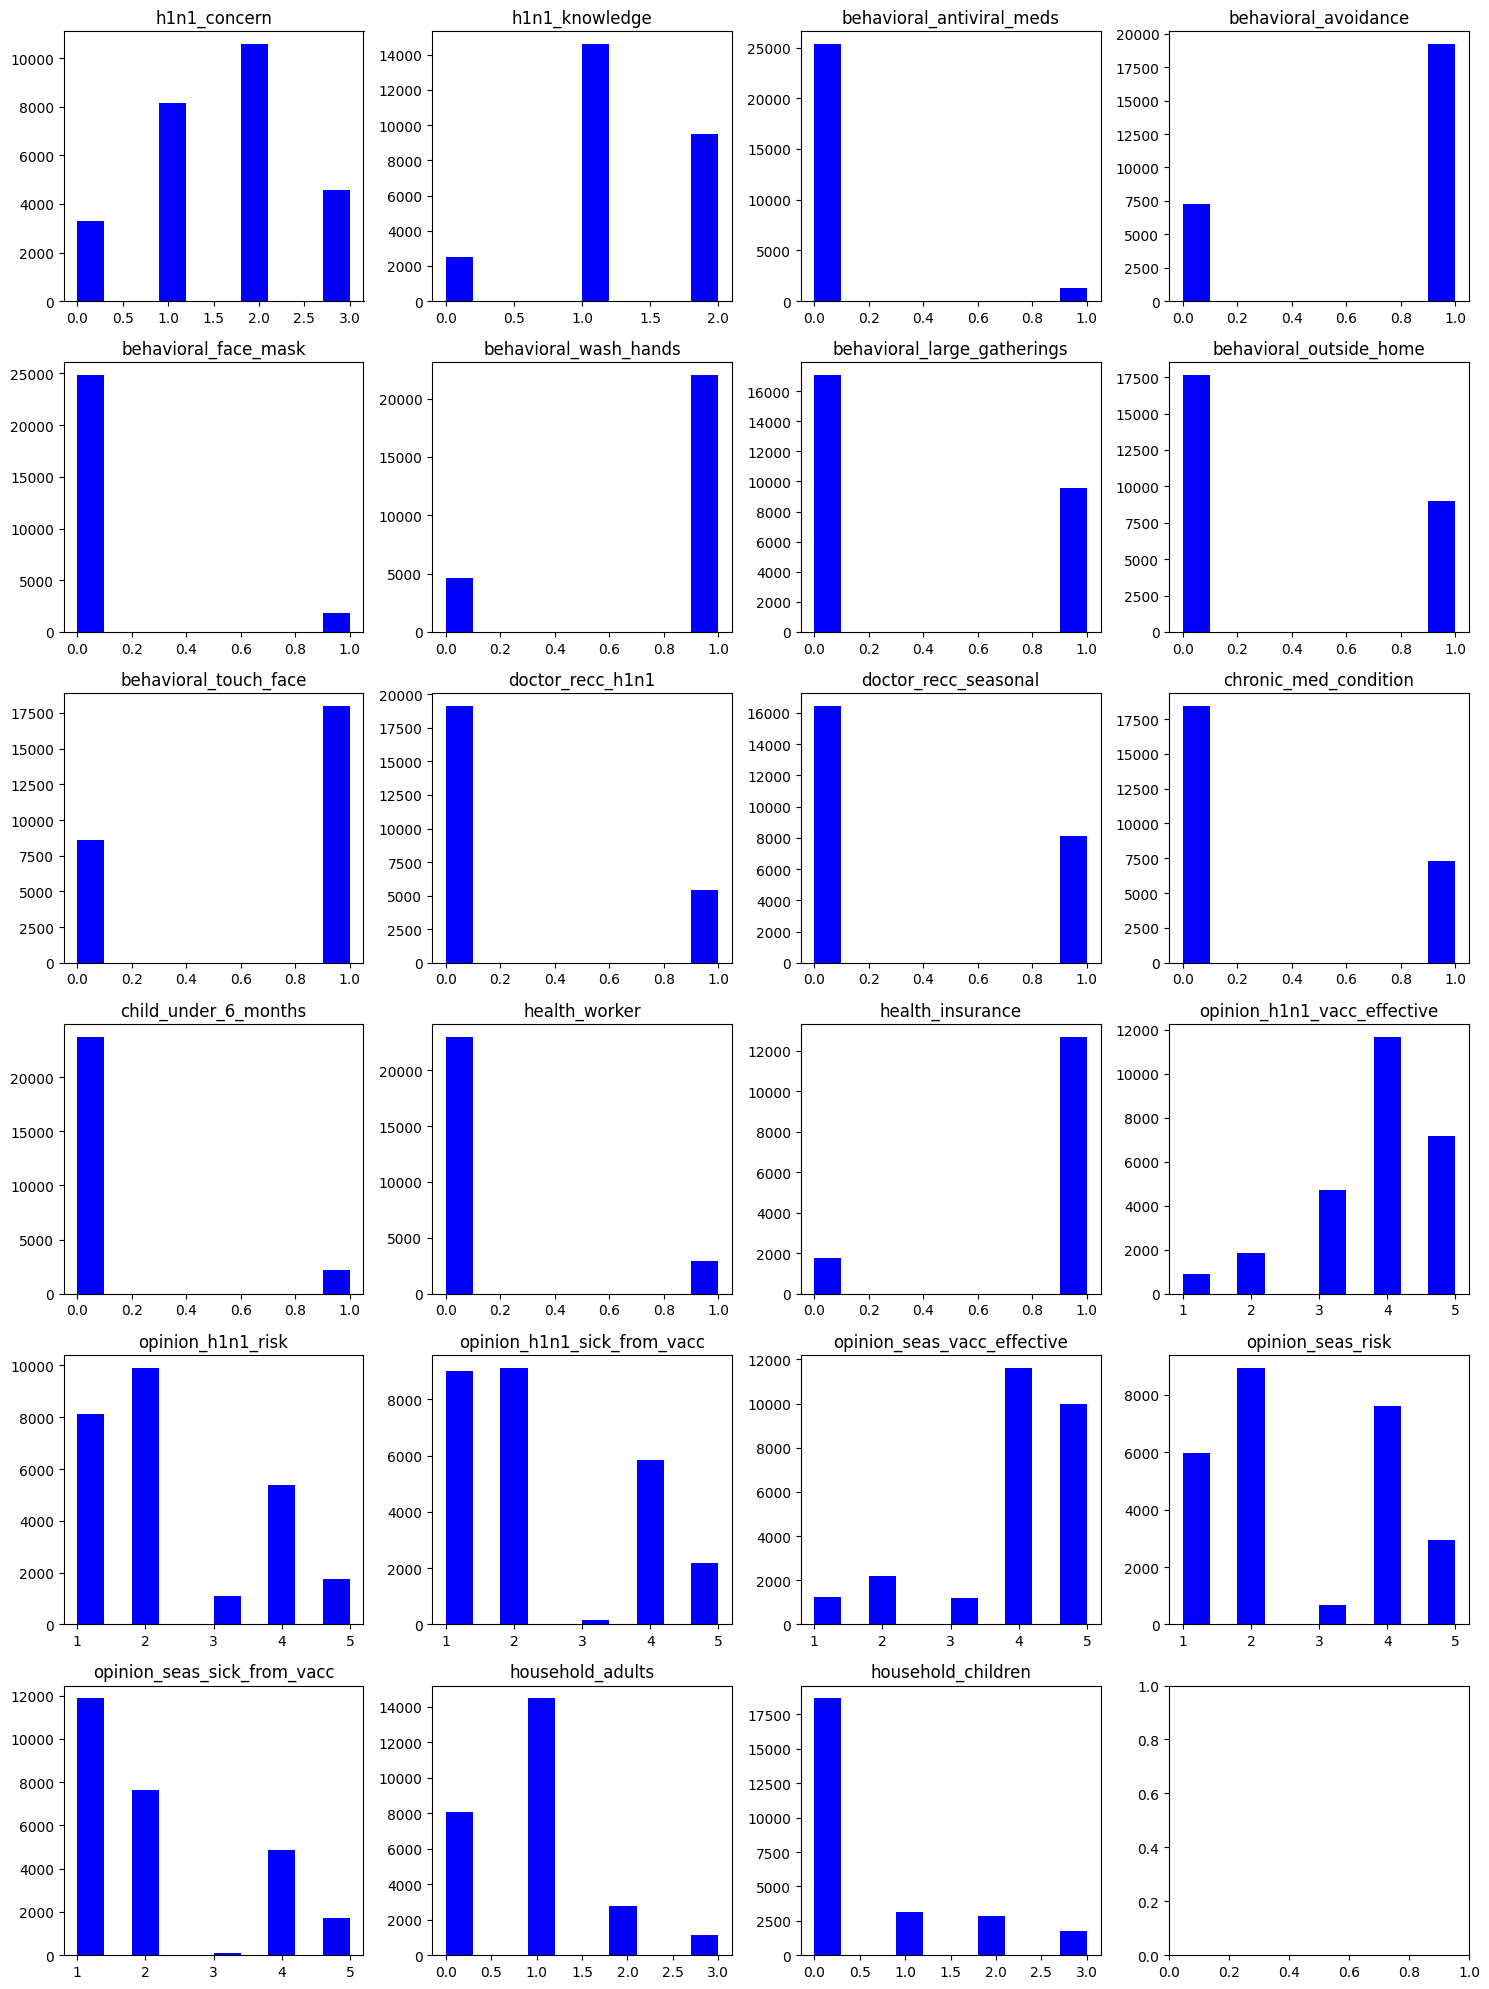

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 20))

axes = axes.flatten()

for n in range(len(numeric_cols)):
    axes[n].hist(train_data[numeric_cols[n]], color="blue", lw=0)
    axes[n].title.set_text(numeric_cols[n])

fig.tight_layout()
plt.show()

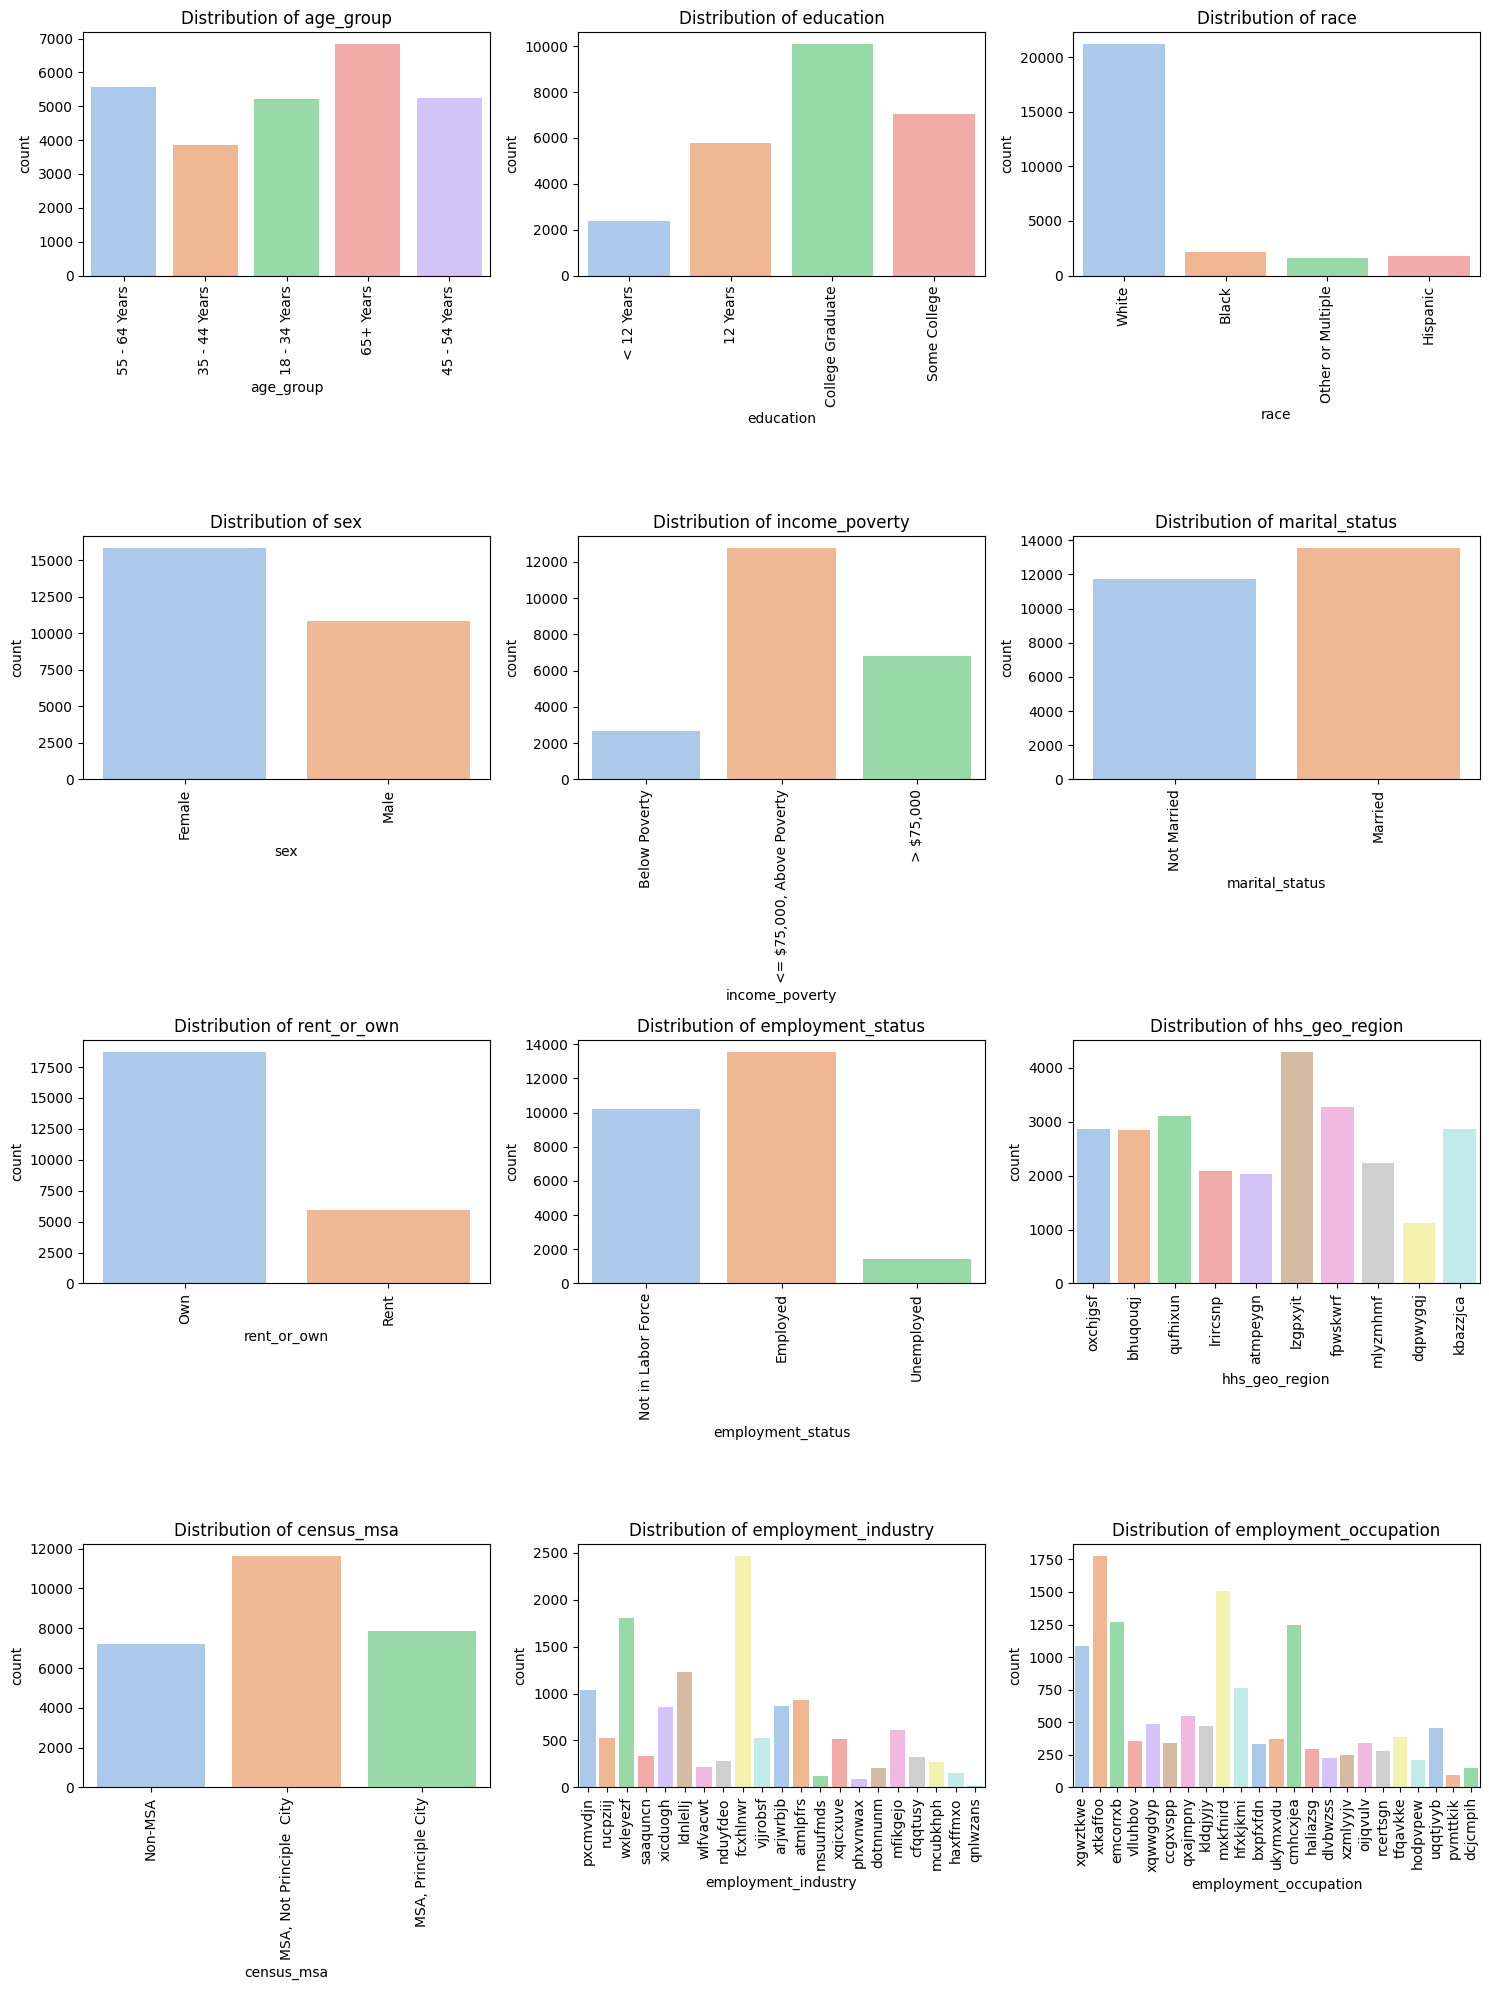

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

palette = sns.color_palette("pastel")

for idx, col in enumerate(categorical_features):
    ax = axes[idx // 3, idx % 3]
    sns.countplot(x=col, data=train_data, palette=palette, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()
plt.show()

***ENCODING - FILLING MISSING VALUES***

In [ ]:
#data with filled mean
filled_mean = train_data.copy()
for col in numeric_cols:
    filled_mean[col].fillna((filled_mean[col].mean()), inplace=True)

#data with filled median
filled_median = train_data.copy()
for col in numeric_cols:
    filled_median[col].fillna((filled_median[col].median()), inplace=True)

#data with filled interpolation
filled_interpolated = train_data.copy()
filled_interpolated = filled_interpolated.interpolate()

In [ ]:
filled_mean_mod = filled_mean.copy()
filled_median_mod = filled_median.copy()
filled_interpolated_mod = filled_interpolated.copy()

filled_mean_random = filled_mean.copy()
filled_median_random = filled_median.copy()
filled_interpolated_random = filled_interpolated.copy()

for c in categorical_features:
    filled_mean_mod[c].fillna(filled_mean_mod[c].mode()[0], inplace=True)
    filled_median_mod[c].fillna(filled_median_mod[c].mode()[0], inplace=True)
    filled_interpolated_mod[c].fillna(filled_interpolated_mod[c].mode()[0], inplace=True)

    cleaned_list = [x for x in filled_mean_mod[c] if str(x) != 'nan']
    filled_mean_random[c].fillna(random.choice(cleaned_list), inplace=True)
    filled_median_random[c].fillna(random.choice(cleaned_list), inplace=True)
    filled_interpolated_random[c].fillna(random.choice(cleaned_list), inplace=True)

In [ ]:
filled_mean_random_LE = filled_mean_random.copy()

label_encoder = LabelEncoder()

filled_mean_random_LE['age_group']= label_encoder.fit_transform(filled_mean_random_LE['age_group'])
filled_mean_random_LE['education']= label_encoder.fit_transform(filled_mean_random_LE['education'])
filled_mean_random_LE['race']= label_encoder.fit_transform(filled_mean_random_LE['race'])
filled_mean_random_LE['sex']= label_encoder.fit_transform(filled_mean_random_LE['sex'])
filled_mean_random_LE['income_poverty']= label_encoder.fit_transform(filled_mean_random_LE['income_poverty'])
filled_mean_random_LE['marital_status']= label_encoder.fit_transform(filled_mean_random_LE['marital_status'])
filled_mean_random_LE['rent_or_own']= label_encoder.fit_transform(filled_mean_random_LE['rent_or_own'])
filled_mean_random_LE['employment_status']= label_encoder.fit_transform(filled_mean_random_LE['employment_status'])
filled_mean_random_LE['hhs_geo_region']= label_encoder.fit_transform(filled_mean_random_LE['hhs_geo_region'])
filled_mean_random_LE['census_msa']= label_encoder.fit_transform(filled_mean_random_LE['census_msa'])
filled_mean_random_LE['employment_industry']= label_encoder.fit_transform(filled_mean_random_LE['employment_industry'])
filled_mean_random_LE['employment_occupation']= label_encoder.fit_transform(filled_mean_random_LE['employment_occupation'])

filled_mean_random_LE

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,2,1,0,1,8,2,0.0,0.0,1,11
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,2,1,1,0,1,0,0.0,0.0,12,19
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,9,0,2.0,0.0,14,21
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,2,1,1,1,5,1,0.0,0.0,1,11
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,0,0,0,0,9,0,1.0,0.0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,0,1,0,1,9,2,0.0,0.0,1,11
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,0,1,1,0,6,1,1.0,0.0,4,2
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,0,1,0,1,6,0,0.0,0.0,1,11
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,0,0,1,0,5,2,1.0,0.0,4,6


In [ ]:
X_one_hot = filled_mean_mod.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_mean_mod = filled_mean_mod.drop(columns=categorical_features, axis=1)
filled_mean_mod = pd.concat([filled_mean_mod,X_one_hot], axis=1)

filled_mean_mod

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,False,False,False,False,False,False,False,False,True,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_one_hot = filled_median_mod.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_median_mod = filled_median_mod.drop(columns=categorical_features, axis=1)
filled_median_mod = pd.concat([filled_median_mod, X_one_hot], axis=1)

filled_median_mod

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_one_hot = filled_interpolated_mod.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_interpolated_mod = filled_interpolated_mod.drop(columns=categorical_features, axis=1)
filled_interpolated_mod = pd.concat([filled_interpolated_mod, X_one_hot], axis=1)

filled_interpolated_mod


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_one_hot = filled_mean_random.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_mean_random = filled_mean_random.drop(columns=categorical_features, axis=1)
filled_mean_random = pd.concat([filled_mean_random, X_one_hot], axis=1)

filled_mean_random


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,False,False,False,False,False,False,False,False,False,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_one_hot = filled_median_random.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_median_random = filled_median_random.drop(columns=categorical_features, axis=1)
filled_median_random = pd.concat([filled_median_random, X_one_hot], axis=1)

filled_median_random


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_one_hot = filled_interpolated_random.copy()

X_one_hot = pd.get_dummies(X_one_hot, columns=categorical_features)
filled_interpolated_random = filled_interpolated_random.drop(columns=categorical_features, axis=1)
filled_interpolated_random = pd.concat([filled_interpolated_random, X_one_hot], axis=1)

filled_interpolated_random


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,True,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
corr_matrix = X_one_hot.corr()

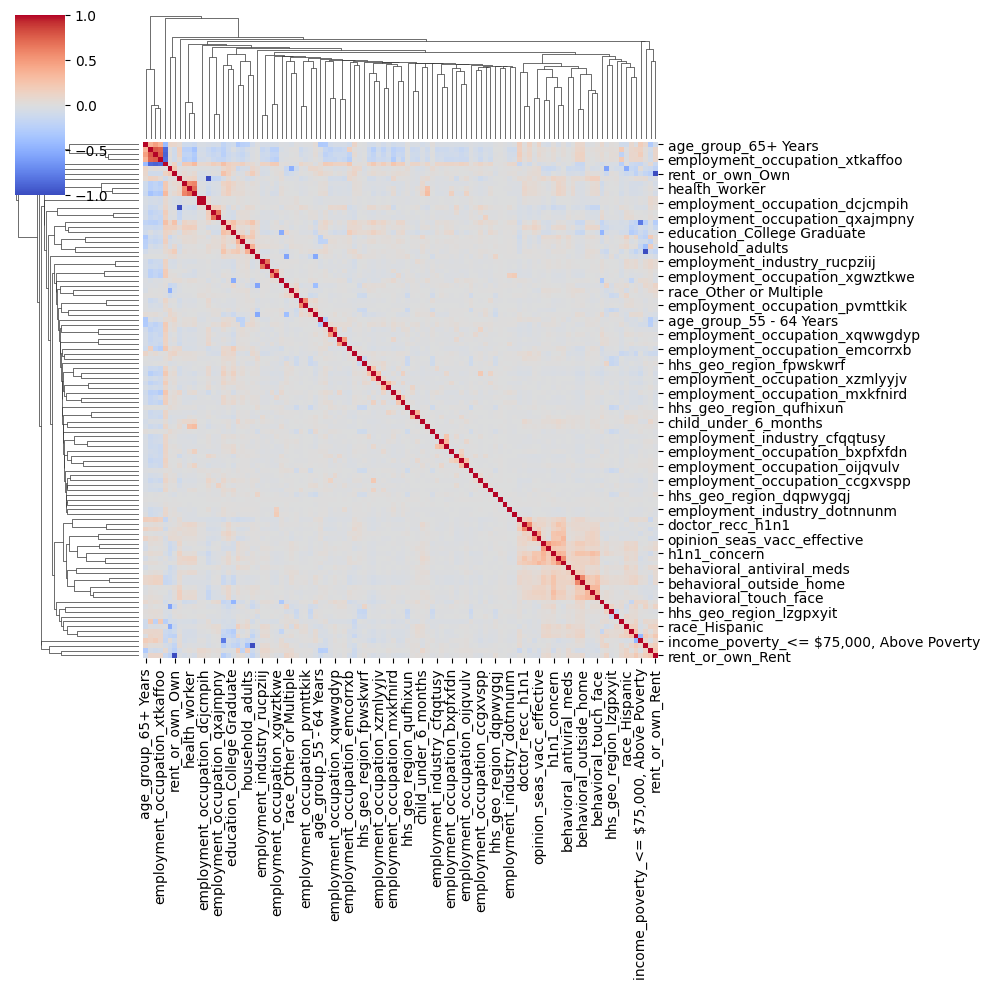

In [ ]:
sns.clustermap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

***Filling Performance***

In [ ]:
model = XGBClassifier(use_label_encoder=False,eval_metric='auc')

In [ ]:
import re

for df in [filled_mean_mod, filled_median_mod,
           filled_interpolated_mod, filled_mean_random,
           filled_median_random, filled_interpolated_random]:
    df.columns = [re.sub(r'[\[\]<]', '', col) for col in df.columns]

In [ ]:
# Mean and mode filling
X_train_mean_mod, X_test_mean_mod, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_mean_mod.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_mean_mod.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_mean_mod, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_mean_mod)
print("model with nan_filled_with_mean_and_mod AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_mean_mod, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_mean_mod)
print("model with nan_filled_with_mean_and_mod AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with nan_filled_with_mean_and_mod AUC score for h1n1: 0.8563921875131315
model with nan_filled_with_mean_and_mod AUC score for seasonal: 0.8570042709115262


In [ ]:
# Median and mode filling

X_train_median_mod, X_test_median_mod, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_median_mod.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_median_mod.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_median_mod, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_median_mod)
print("model with nan_filled_with_median_and_mod AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_median_mod, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_median_mod)
print("model with nan_filled_with_median_and_mod AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with nan_filled_with_median_and_mod AUC score for h1n1: 0.8225211994386035
model with nan_filled_with_median_and_mod AUC score for seasonal: 0.8509603870592072


In [ ]:
# Interpolation and mode filling
X_train_interp_mod, X_test_interp_mod, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_interpolated_mod.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_interpolated_mod.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_interp_mod, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_interp_mod)
print("model with nan_filled_with_interpolated_and_mod AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_interp_mod, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_interp_mod)
print("model with nan_filled_with_interpolated_and_mod AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with nan_filled_with_interpolated_and_mod AUC score for h1n1: 0.8238263621006984
model with nan_filled_with_interpolated_and_mod AUC score for seasonal: 0.8503141687768607


In [ ]:
# Mean and random filling
X_train_mean_rand, X_test_mean_rand, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_mean_random.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_mean_random.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_mean_rand, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_mean_rand)
print("model with nan_filled_with_mean_and_random AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_mean_rand, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_mean_rand)
print("model with nan_filled_with_mean_and_random AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with nan_filled_with_mean_and_random AUC score for h1n1: 0.8585907100656364
model with nan_filled_with_mean_and_random AUC score for seasonal: 0.8586615195006492


In [ ]:
# Median and random filling
X_train_median_rand, X_test_median_rand, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_median_random.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_median_random.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_median_rand, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_median_rand)
print("model with nan_filled_with_median_and_random AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_median_rand, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_median_rand)
print("model with nan_filled_with_median_and_random AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with nan_filled_with_median_and_random AUC score for h1n1: 0.8253329089243543
model with nan_filled_with_median_and_random AUC score for seasonal: 0.8495838390954581


In [ ]:
# Interpolation and random filling
X_train_interp_rand, X_test_interp_rand, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_interpolated_random.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_interpolated_random.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

model.fit(X_train_interp_rand, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_interp_rand)
print("model nan_filled_with_interpolated_and_random AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

model.fit(X_train_interp_rand, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_interp_rand)
print("model nan_filled_with_interpolated_and_random AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model nan_filled_with_interpolated_and_random AUC score for h1n1: 0.8250010505172747
model nan_filled_with_interpolated_and_random AUC score for seasonal: 0.8510039951503287


In [ ]:
X_train_LE, X_test_LE, y_train_h1n1, y_test_h1n1 = train_test_split(
    filled_mean_random_LE.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    filled_mean_random_LE.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)

# H1N1 için model eğitimi ve değerlendirmesi
model.fit(X_train_LE, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_LE)
print("model with filled_mean_random_LE AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

# Seasonal grip için model eğitimi ve değerlendirmesi
model.fit(X_train_LE, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_LE)
print("model with filled_mean_random_LE AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

model with filled_mean_random_LE AUC score for h1n1: 0.590482943801528
model with filled_mean_random_LE AUC score for seasonal: 0.6469098022380124


***Feature Scaling***

In [ ]:
norm_scaled_filled_mean_random = pd.DataFrame(StandardScaler().fit_transform(filled_mean_random))

# Normalize and mean-random filling
X_train_norm_mean_rand, X_test_norm_mean_rand, y_train_h1n1, y_test_h1n1 = train_test_split(
    norm_scaled_filled_mean_random.iloc[:, 25:], train_labels.iloc[:, 1], test_size=0.2, random_state=42
)

_, _, y_train_seasonal, y_test_seasonal = train_test_split(
    norm_scaled_filled_mean_random.iloc[:, 25:], train_labels.iloc[:, 2], test_size=0.2, random_state=42
)
# H1N1
model.fit(X_train_norm_mean_rand, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_norm_mean_rand)
print("model with norm_scaled_filled_with_mean_and_random AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

# Seasonal
model.fit(X_train_norm_mean_rand, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_norm_mean_rand)
print("model with norm_scaled_filled_with_mean_and_random AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))


model with norm_scaled_filled_with_mean_and_random AUC score for h1n1: 0.8585907100656364
model with norm_scaled_filled_with_mean_and_random AUC score for seasonal: 0.8586615195006492


***Feature Extraction***

In [ ]:
# PCA and normalize-mean-random filling
pca = PCA(.95)
pca.fit(X_train_norm_mean_rand)
X_train_pca = pca.transform(X_train_norm_mean_rand)
X_test_pca = pca.transform(X_test_norm_mean_rand)

# H1N1 PCA
model.fit(X_train_pca, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_pca)
print("PCA model AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

# Seasonal PCA
model.fit(X_train_pca, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_pca)
print("PCA model AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

PCA model AUC score for h1n1: 0.7963182521073376
PCA model AUC score for seasonal: 0.8222565253722177


In [ ]:
# H1N1 LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_norm_mean_rand, y_train_h1n1)
X_test_lda = lda.transform(X_test_norm_mean_rand)
model.fit(X_train_lda, y_train_h1n1)
y_pred_proba = model.predict_proba(X_test_lda)
print("LDA model AUC score for h1n1:", roc_auc_score(y_test_h1n1, y_pred_proba[:, 1]))

# Seasonal LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_norm_mean_rand, y_train_seasonal)
X_test_lda = lda.transform(X_test_norm_mean_rand)
model.fit(X_train_lda, y_train_seasonal)
y_pred_proba = model.predict_proba(X_test_lda)
print("LDA model AUC score for seasonal:", roc_auc_score(y_test_seasonal, y_pred_proba[:, 1]))

LDA model AUC score for h1n1: 0.8271526149476003
LDA model AUC score for seasonal: 0.8537622421953865


***Train-Test Split***

In [ ]:
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(
    norm_scaled_filled_mean_random.iloc[:10000, 25:],
    train_labels.iloc[:10000, 1],
    test_size=0.2,
    random_state=42
)

X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(
    norm_scaled_filled_mean_random.iloc[:10000, 25:],
    train_labels.iloc[:10000, 2],
    test_size=0.2,
    random_state=42
)

***HYPERPARAMETER GRID***

In [ ]:

models = {
    'LogisticRegression': (LogisticRegression(max_iter=1000), {
        'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'classifier__C': np.logspace(-4, 4, 20),
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }),
    'RandomForestClassifier': (RandomForestClassifier(), {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__criterion': ['gini', 'entropy']
    }),
    'SVC': (SVC(), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__kernel': ['linear', 'rbf', 'poly']
    }),
    'KNeighborsClassifier': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    'MLPClassifier': (MLPClassifier(max_iter=1000), {
        'classifier__hidden_layer_sizes': [(10,), (50,), (100,)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__learning_rate': ['constant', 'adaptive']
    })
}

In [ ]:
def run_grid_search(X, y, model, params, cv=5, n_jobs=-1, scoring='accuracy'):
    pipe = Pipeline([('classifier', model)])
    clf = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=n_jobs, scoring=scoring, verbose=1)
    clf.fit(X, y)
    return clf

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
    except AttributeError:
        auc_score = None
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'auc': auc_score
    }

In [ ]:
results = {'H1N1': {}, 'Seasonal': {}}

for target, y_train, y_test in [('H1N1', y_train_h1n1, y_test_h1n1), ('Seasonal', y_train_seasonal, y_test_seasonal)]:
    print(f"\nRunning GridSearchCV for {target}...")

    for model_name, (model, params) in models.items():
        print(f"{model_name}")
        clf = run_grid_search(X_train, y_train, model, params)
        print(f"    Best cross-validation score: {clf.best_score_:.4f}")

        best_model = clf.best_estimator_
        best_model.fit(X_train, y_train)

        test_results = evaluate_model(best_model, X_test, y_test)
        test_results['best_estimator'] = best_model

        results[target][model_name] = test_results
        print(f"    Test set results: {test_results}")

        result_table = pd.DataFrame(clf.cv_results_)



Running GridSearchCV for H1N1...
LogisticRegression
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
    Best cross-validation score: 0.8349
    Test set results: {'accuracy': 0.832, 'f1': 0.8208012440146546, 'precision': 0.8176563016737245, 'recall': 0.832, 'auc': 0.824474701941078, 'best_estimator': Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.033598182862837805, max_iter=1000,
                                    solver='liblinear'))])}
RandomForestClassifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    Best cross-validation score: 0.8464
    Test set results: {'accuracy': 0.85, 'f1': 0.8325252900127645, 'precision': 0.8386058205545192, 'recall': 0.85, 'auc': 0.8423005037442113, 'best_estimator': Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])}
SVC
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    Best cross-validation score: 0.8329
    Test s

***RESULTS***

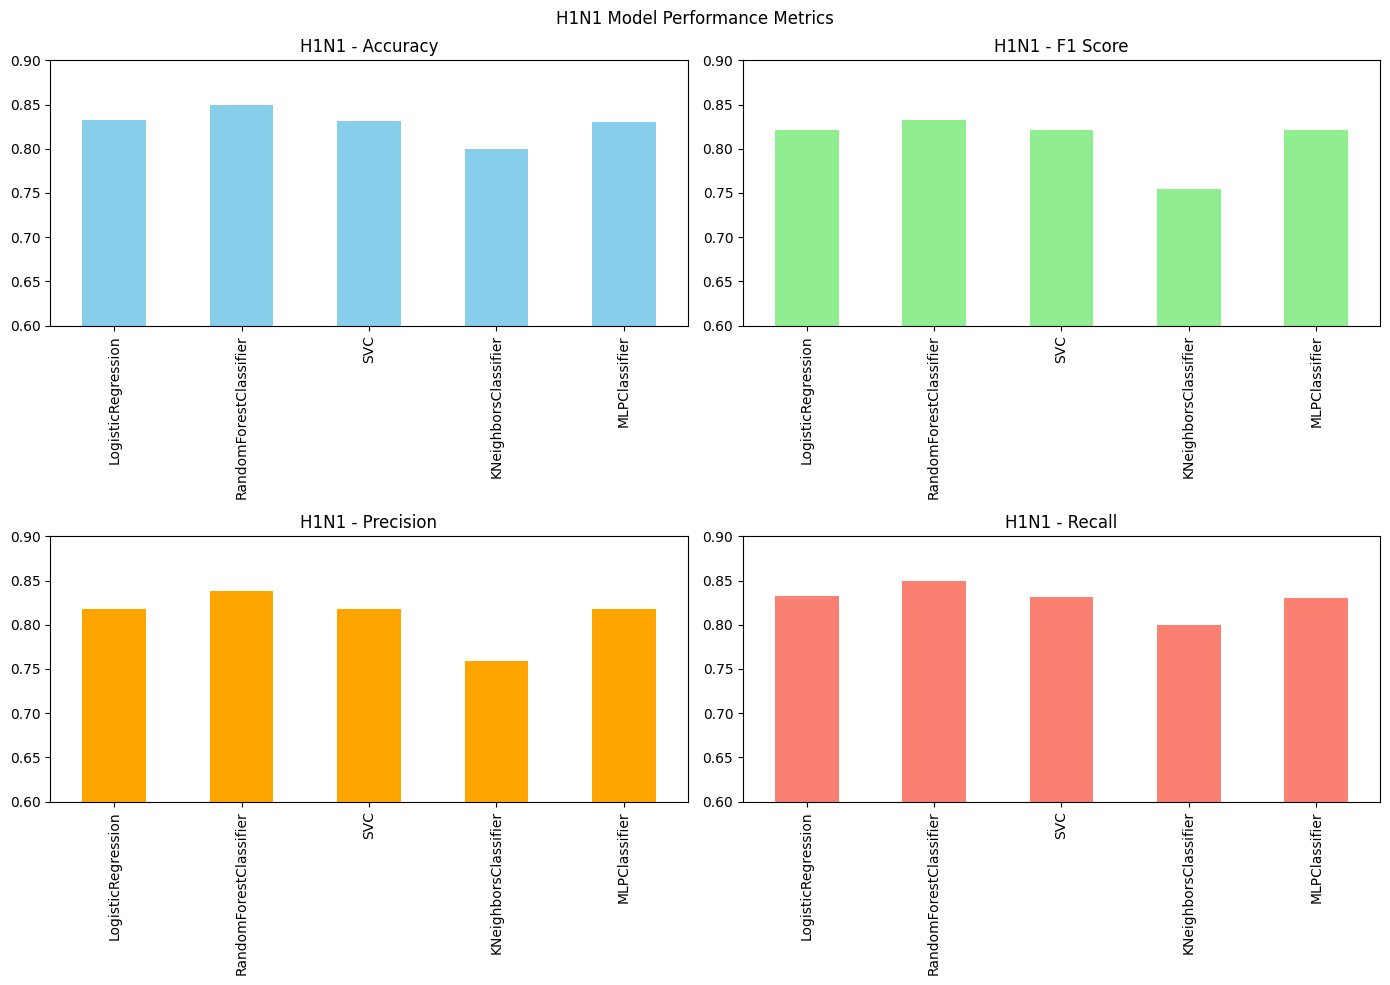

In [ ]:
df_results_h1n1 = pd.DataFrame(results['H1N1']).T

# H1N1 results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df_results_h1n1['accuracy'].plot(kind='bar', ax=axes[0, 0], title='H1N1 - Accuracy', color='skyblue')
axes[0, 0].set_ylim(0.6, 0.9)

df_results_h1n1['f1'].plot(kind='bar', ax=axes[0, 1], title='H1N1 - F1 Score', color='lightgreen')
axes[0, 1].set_ylim(0.6, 0.9)

df_results_h1n1['precision'].plot(kind='bar', ax=axes[1, 0], title='H1N1 - Precision', color='orange')
axes[1, 0].set_ylim(0.6, 0.9)

df_results_h1n1['recall'].plot(kind='bar', ax=axes[1, 1], title='H1N1 - Recall', color='salmon')
axes[1, 1].set_ylim(0.6, 0.9)

plt.suptitle('H1N1 Model Performance Metrics')
plt.tight_layout()
plt.show()



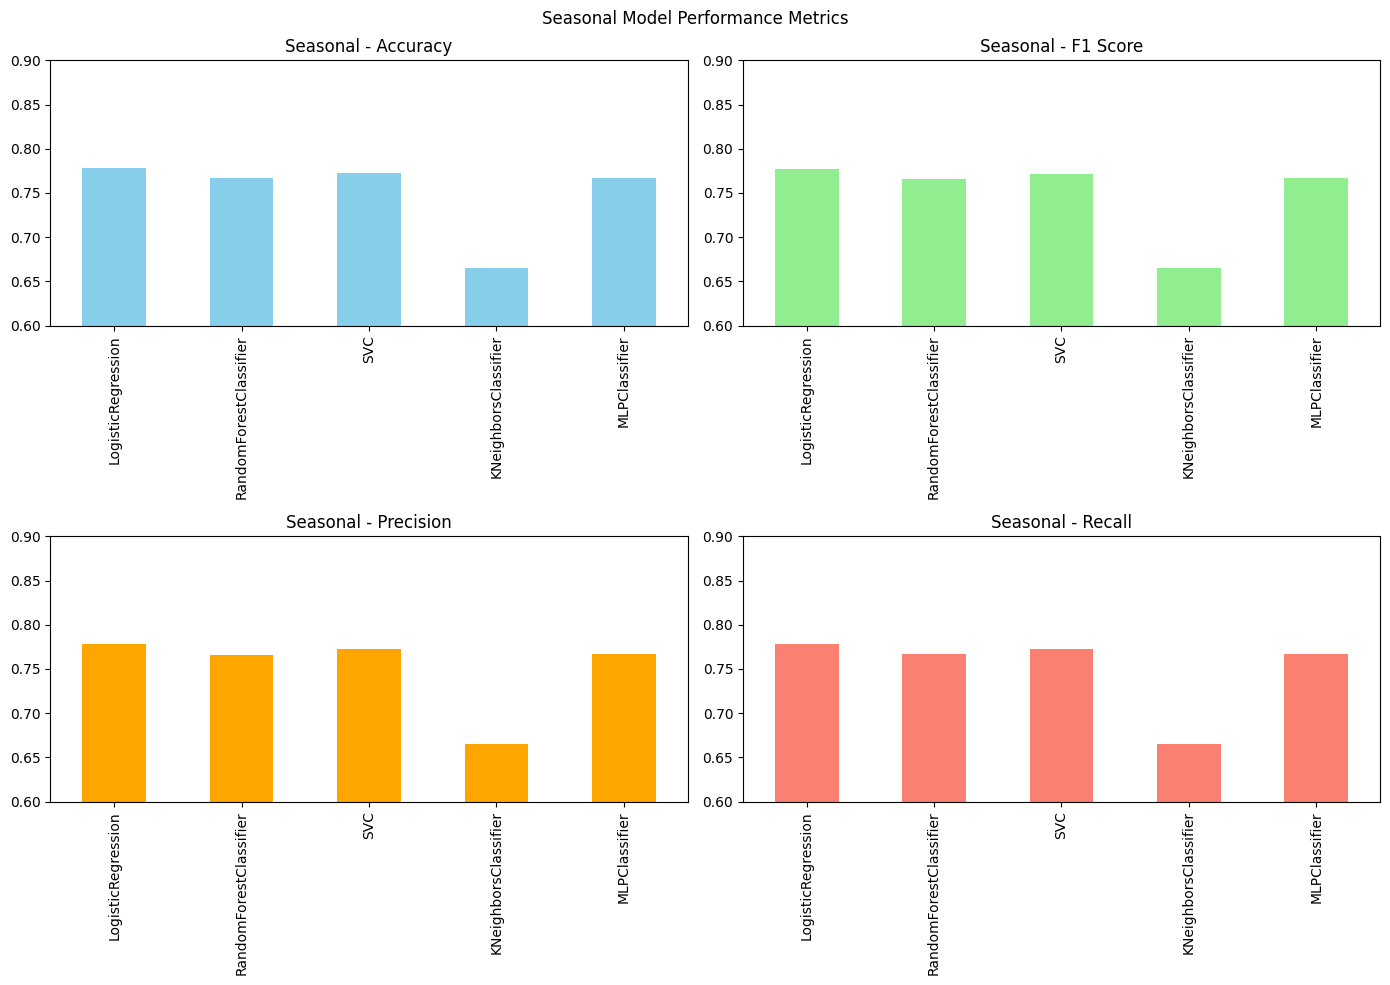

In [ ]:
df_results_seasonal = pd.DataFrame(results['Seasonal']).T

# Seasonal results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df_results_seasonal['accuracy'].plot(kind='bar', ax=axes[0, 0], title='Seasonal - Accuracy', color='skyblue')
axes[0, 0].set_ylim(0.6, 0.90)

df_results_seasonal['f1'].plot(kind='bar', ax=axes[0, 1], title='Seasonal - F1 Score', color='lightgreen')
axes[0, 1].set_ylim(0.6, 0.90)

df_results_seasonal['precision'].plot(kind='bar', ax=axes[1, 0], title='Seasonal - Precision', color='orange')
axes[1, 0].set_ylim(0.6, 0.90)

df_results_seasonal['recall'].plot(kind='bar', ax=axes[1, 1], title='Seasonal - Recall', color='salmon')
axes[1, 1].set_ylim(0.6, 0.90)

plt.suptitle('Seasonal Model Performance Metrics')
plt.tight_layout()
plt.show()

In [ ]:
for target in ['H1N1', 'Seasonal']:
    df_results = pd.DataFrame(results[target])
    print(f"\n{target} Results:")
    print(df_results)
    print("\n")


H1N1 Results:
                                               LogisticRegression  \
accuracy                                                    0.832   
f1                                                       0.820801   
precision                                                0.817656   
recall                                                      0.832   
auc                                                      0.824475   
best_estimator  (LogisticRegression(C=0.033598182862837805, ma...   

                                           RandomForestClassifier  \
accuracy                                                     0.85   
f1                                                       0.832525   
precision                                                0.838606   
recall                                                       0.85   
auc                                                      0.842301   
best_estimator  ((DecisionTreeClassifier(criterion='entropy', ...   

                 

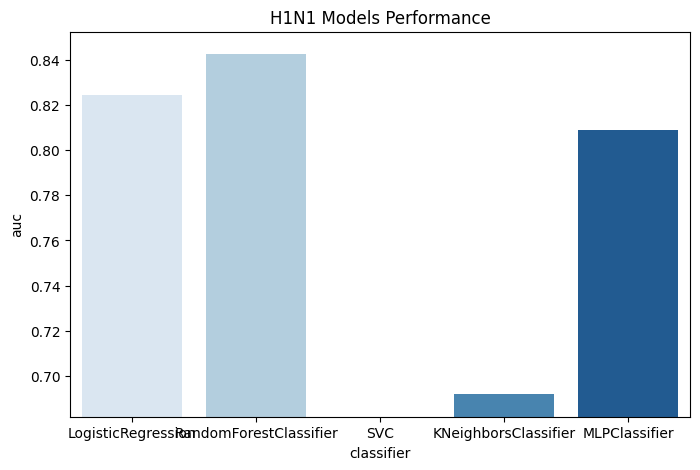

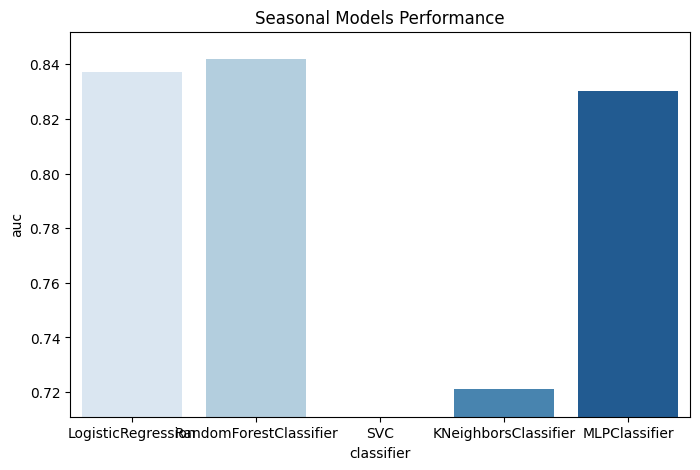

In [ ]:
h1n1_table = pd.DataFrame()
seasonal_table = pd.DataFrame()

for target in ['H1N1', 'Seasonal']:
    for model_name, metrics in results[target].items():
        row = {
            'classifier': model_name,
            'accuracy': metrics['accuracy'],
            'f1': metrics['f1'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'auc': metrics.get('auc'),
        }
        if target == 'H1N1':
            h1n1_table = pd.concat([h1n1_table, pd.DataFrame([row])], ignore_index=True)
        elif target == 'Seasonal':
            seasonal_table = pd.concat([seasonal_table, pd.DataFrame([row])], ignore_index=True)

# H1N1
plt.figure(figsize=(8, 5))
plt.title("H1N1 Models Performance")
sns.barplot(x='classifier', y='auc', data=h1n1_table, palette='Blues')
plt.ylim(h1n1_table['auc'].min() - 0.01, h1n1_table['auc'].max() + 0.01)
plt.show()

# Seasonal
plt.figure(figsize=(8, 5))
plt.title("Seasonal Models Performance")
sns.barplot(x='classifier', y='auc', data=seasonal_table, palette='Blues')
plt.ylim(seasonal_table['auc'].min() - 0.01, seasonal_table['auc'].max() + 0.01)
plt.show()

***CONFUSION MATRIX***

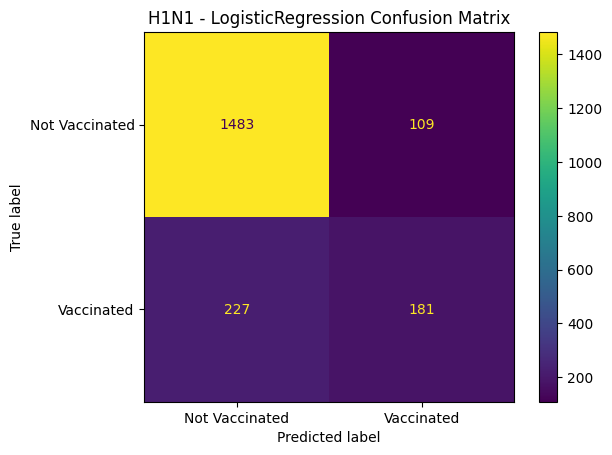

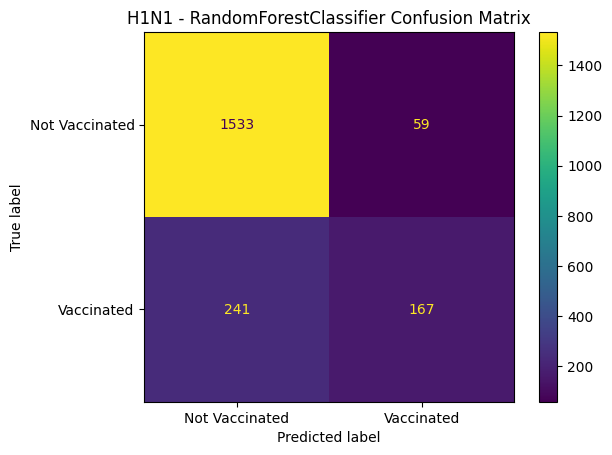

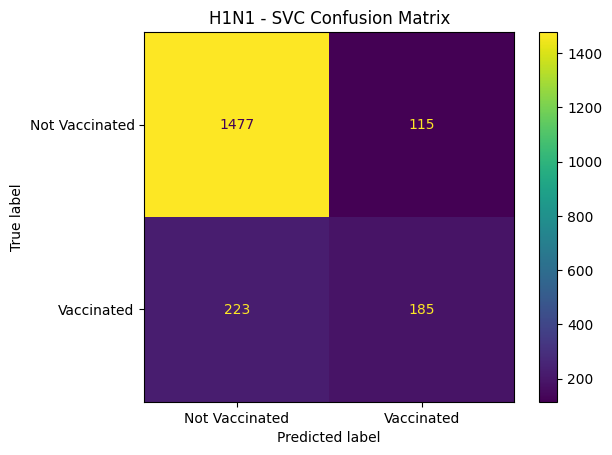

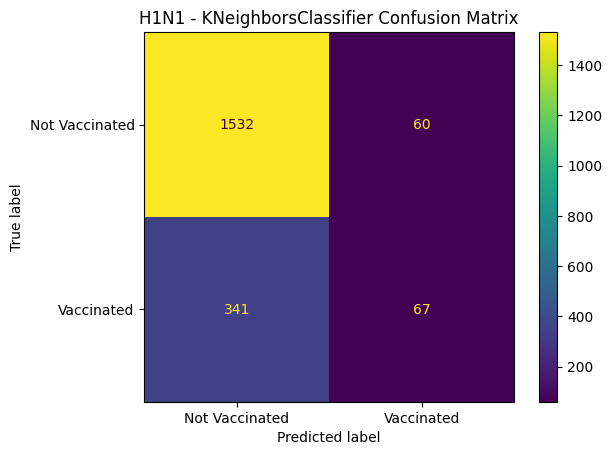

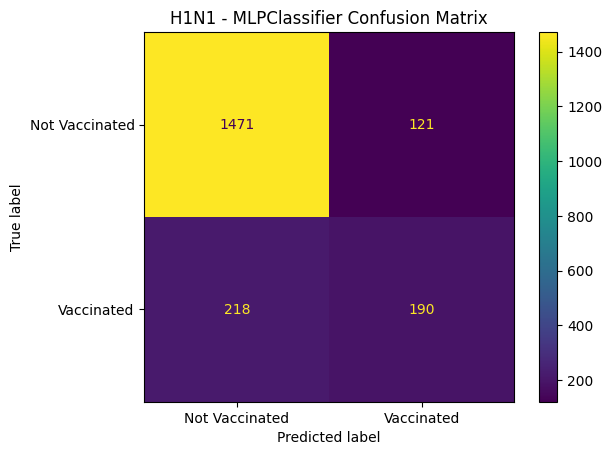

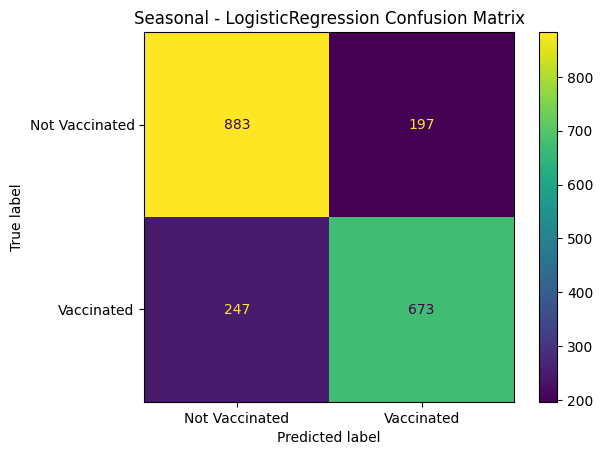

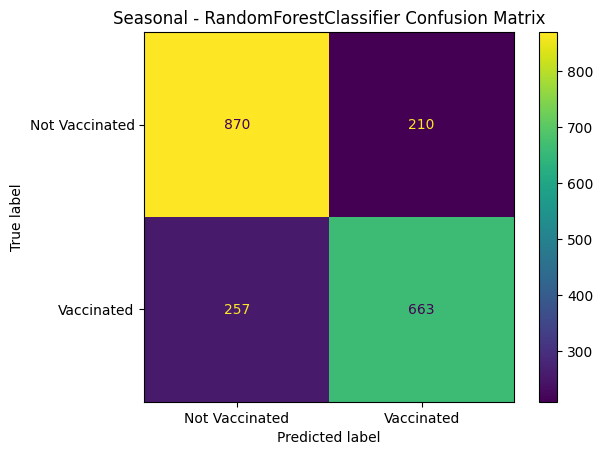

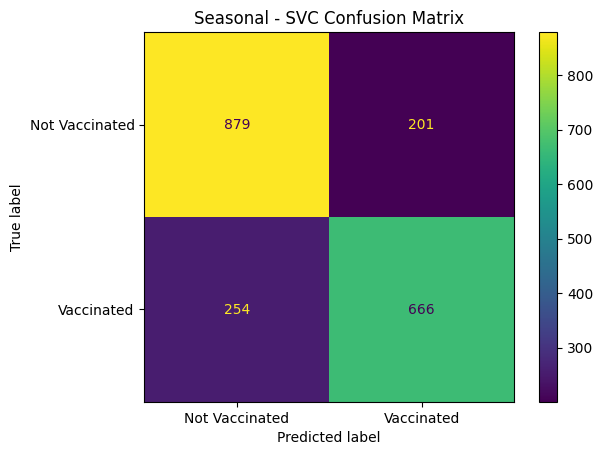

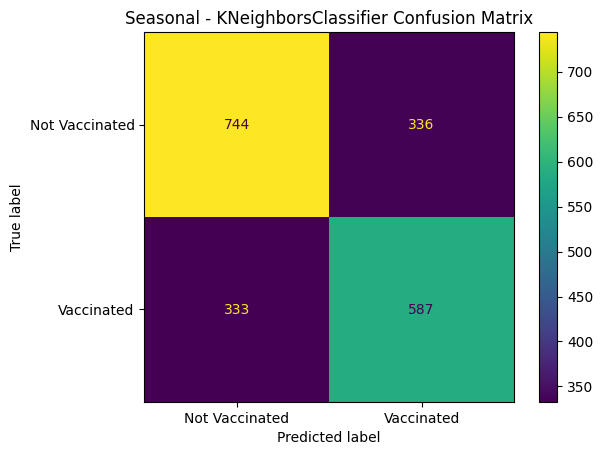

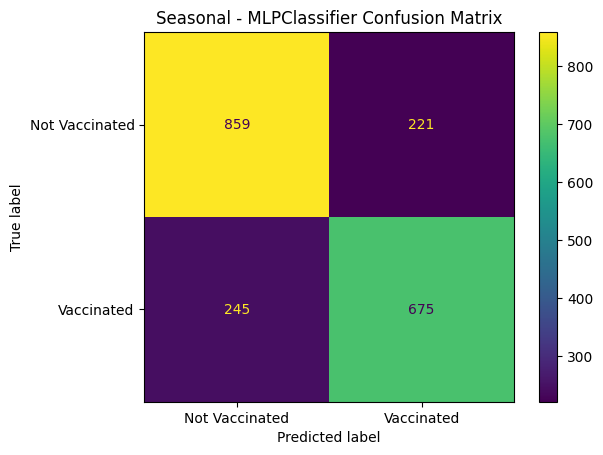

In [ ]:
for target in ['H1N1', 'Seasonal']:
    for model_name, test_results in results[target].items():
        best_model = test_results['best_estimator']
        ConfusionMatrixDisplay.from_estimator(best_model,
                                              X_test,
                                              y_test_h1n1 if target == 'H1N1' else y_test_seasonal,
                                              display_labels=['Not Vaccinated', 'Vaccinated'])
        plt.title(f'{target} - {model_name} Confusion Matrix')
        plt.show()

***ROC/AUC CURVE***

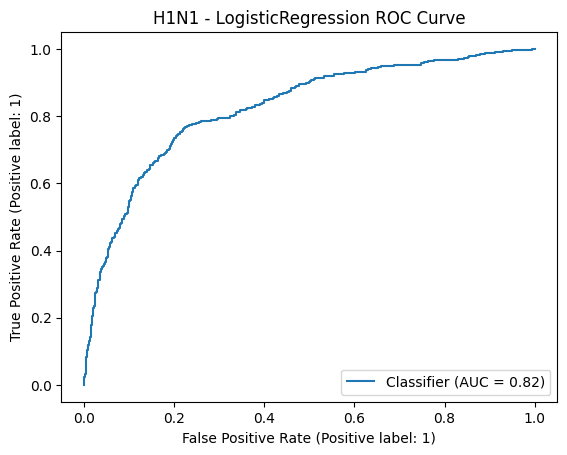

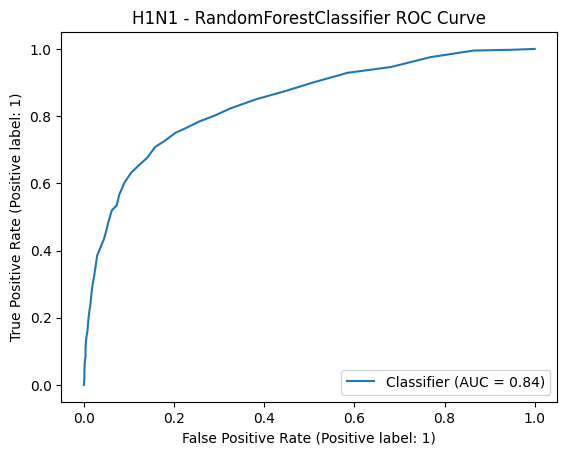

SVC modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.


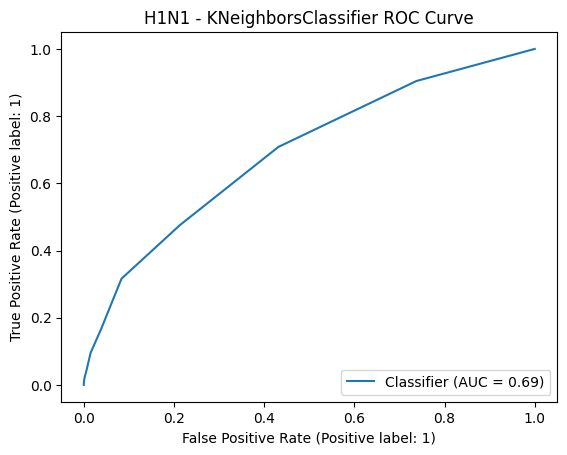

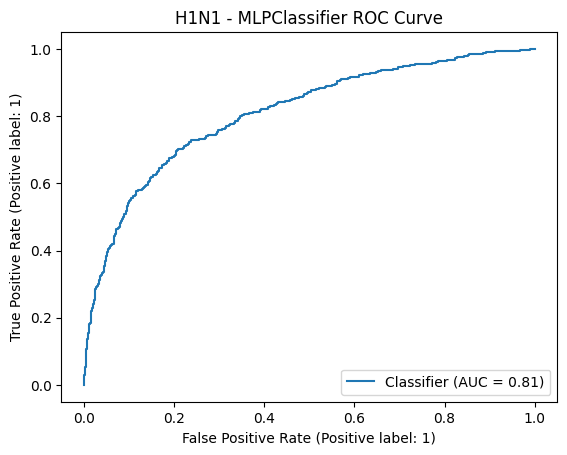

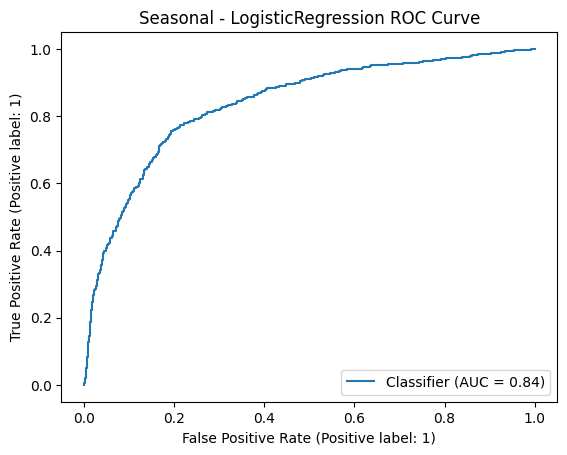

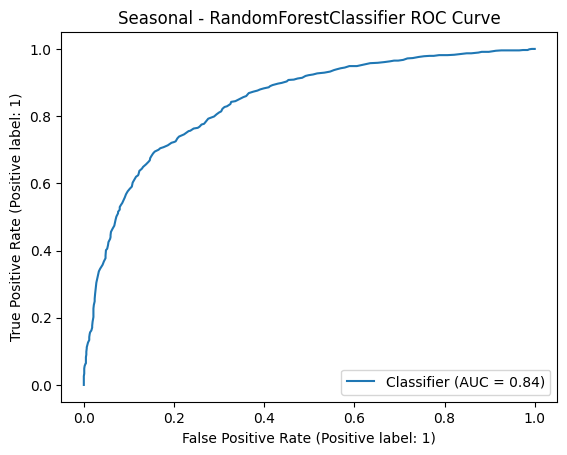

SVC modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.


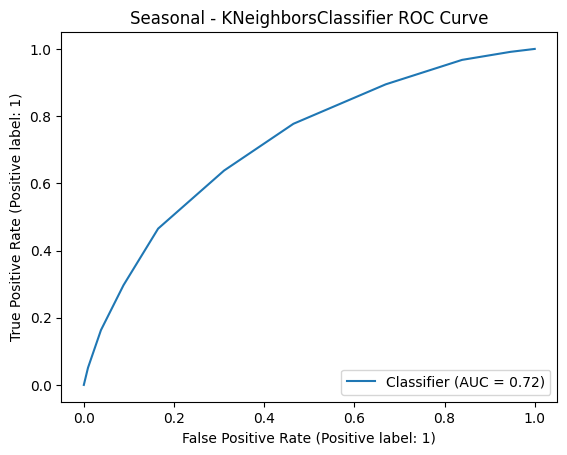

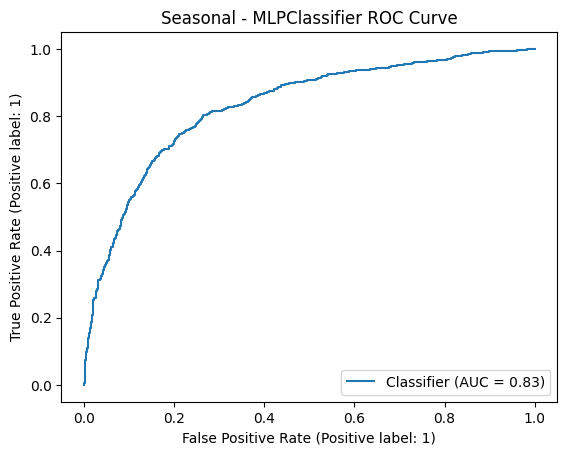

In [ ]:
for target in ['H1N1', 'Seasonal']:
    for model_name, test_results in results[target].items():
        best_model = test_results['best_estimator']

        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test)[:, 1]

            y_test = y_test_h1n1 if target == 'H1N1' else y_test_seasonal

            RocCurveDisplay.from_predictions(y_test, y_prob)
            plt.title(f'{target} - {model_name} ROC Curve')
            plt.show()
        else:
            print(f"{model_name} modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.")

SVC modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.
SVC modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.


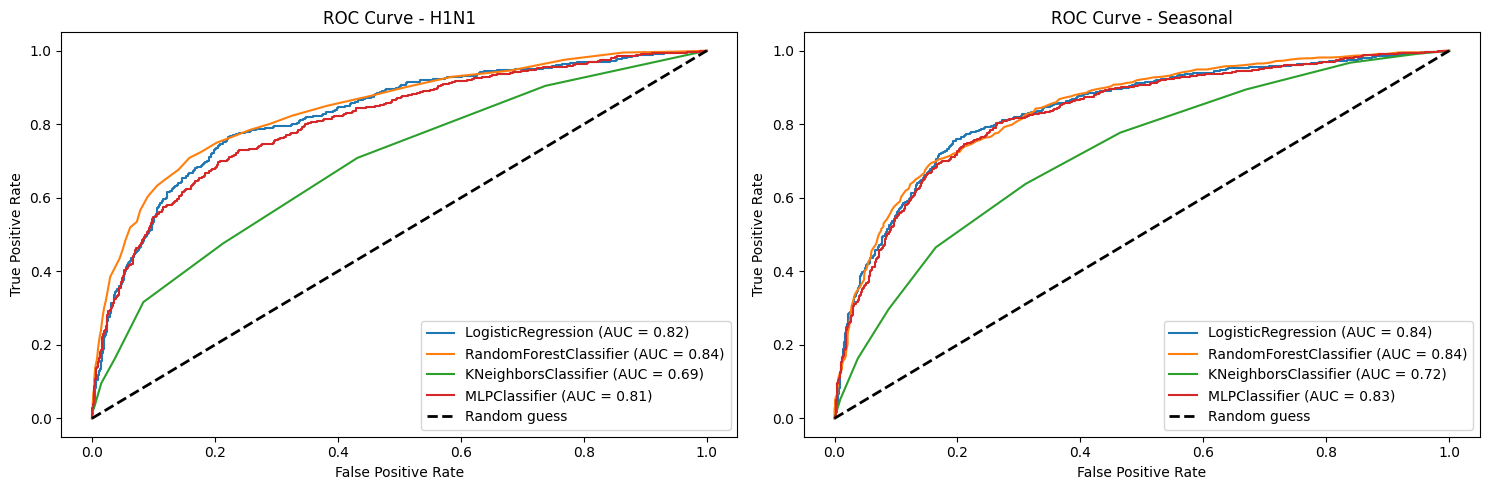

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for idx, (target, ax) in enumerate([('H1N1', ax1), ('Seasonal', ax2)]):
    for model_name, test_results in results[target].items():
        best_model = test_results['best_estimator']

        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test)[:, 1]

            y_test = y_test_h1n1 if target == 'H1N1' else y_test_seasonal

            RocCurveDisplay.from_predictions(
                y_test,
                y_prob,
                name=f'{model_name}',
                ax=ax
            )
        else:
            print(f"{model_name} modeli 'predict_proba' fonksiyonunu desteklemiyor, bu yüzden ROC eğrisi çizilemedi.")


    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random guess')

    ax.set_title(f'ROC Curve - {target}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

***ENSEMBLE - Boosting***

In [ ]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='auc')

params = {
        'learning_rate': [0.01, 0.1],
        'min_child_weight' : range(0, 10, 3),
        'max_depth': [3,10,15],
        'n_estimators': range(100,1001,200),
        'gamma': [0,0.1,1],
        'subsample':[0.6,0.8,1],
        }

gs = GridSearchCV(xgb, param_grid=params, scoring="roc_auc", n_jobs=-1, cv=5, return_train_score=True,verbose=10)

gs.fit(X_train, y_train_h1n1)

print('\n Best hyperparameters for H1N1 vaccine:')
print(gs.best_params_)

print('\n Best score for H1N1 vaccine with Grid Search:')
print(gs.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits

 Best hyperparameters for H1N1 vaccine:
{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 1}

 Best score for H1N1 vaccine with Grid Search:
0.8668491252381777


In [ ]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='auc')

params = {
        'learning_rate': [0.01, 0.1],
        'min_child_weight' : range(0, 10, 3),
        'max_depth': [3,10,15],
        'n_estimators': range(100,1001,200),
        'gamma': [0,0.1,1],
        'subsample':[0.6,0.8,1],
        }

gs = GridSearchCV(xgb, param_grid=params, scoring="roc_auc", n_jobs=-1, cv=5, return_train_score=True,verbose=10)

gs.fit(X_train, y_train_seasonal)

print('\n Best hyperparameters for Seasonal Vaccine:')
print(gs.best_params_)

print('\n Best score for Seasonal vaccine with Grid Search:')
print(gs.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits

 Best hyperparameters for Seasonal Vaccine:
{'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 900, 'subsample': 0.6}

 Best score for Seasonal vaccine with Grid Search:
0.8567867675429042


In [ ]:
combination_counts = train_labels.groupby(['h1n1_vaccine', 'seasonal_vaccine']).size().reset_index(name='count')

total_records = len(train_labels)

combination_counts['percentage'] = (combination_counts['count'] / total_records) * 100

combination_counts

,h1n1_vaccine,seasonal_vaccine,count,percentage
0,0,0,13295,49.780956
1,0,1,7738,28.973677
2,1,0,977,3.658217
3,1,1,4697,17.587149


Stratified K fold üstteki dağılımları koruyarak foldları oluşturur.

In [ ]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='auc')

params_h1n1 = {
        'learning_rate': [0.01, 0.1],
        'min_child_weight' : range(0, 10, 3),
        'max_depth': [3,10,15],
        'n_estimators': range(100,1001,200),
        'gamma': [0,0.1,1],
        'subsample':[0.6,0.8,1],
        'random_state': np.arange(0, 100, 10),
        }

folds = 5
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params_h1n1, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train, y_train_h1n1), verbose=10)
random_search.fit(X_train, y_train_h1n1)

print('\n Best hyperparameters for H1N1 vaccine:')
print(random_search.best_params_)

print('\n Best score for H1N1 vaccine with Randomized Search:')
print(random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best hyperparameters for H1N1 vaccine:
{'subsample': 1, 'random_state': 40, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1}

 Best score for H1N1 vaccine with Randomized Search:
0.8616853167041978


In [ ]:
params_seasonal = {
        'learning_rate': [0.01, 0.1],
        'min_child_weight' : range(0, 10, 3),
        'max_depth': [3,10,15],
        'n_estimators': range(100,1001,200),
        'gamma': [0,0.1,1],
        'subsample':[0.6,0.8,1],
        'random_state': np.arange(0, 100, 10),
        }

folds = 5
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params_seasonal, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train, y_train_seasonal), verbose=3)
random_search.fit(X_train, y_train_seasonal)

print('\n Best hyperparameters for Seasonal Vaccine:')
print(random_search.best_params_)
print('\n Best score for Seasonal vaccine with Randomized Search:')
print(random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best hyperparameters for Seasonal Vaccine:
{'subsample': 0.8, 'random_state': 50, 'n_estimators': 900, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0}

 Best score for Seasonal vaccine with Randomized Search:
0.8567754406183565


***FEATURE IMPORTANCE***

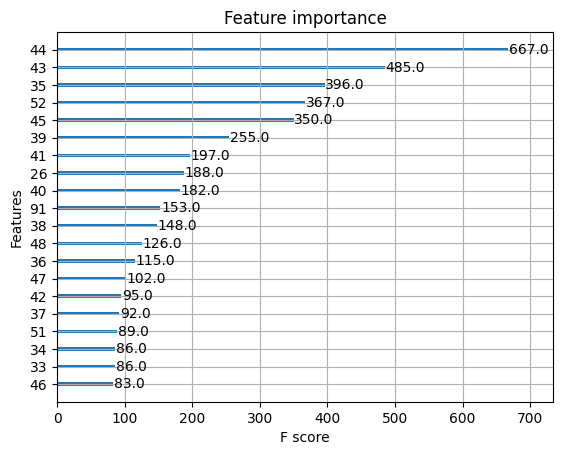

In [ ]:
from xgboost import plot_importance

best_model = gs.best_estimator_

plot_importance(best_model, max_num_features=20)
plt.rcParams.update({'font.size': 8})
plt.show()

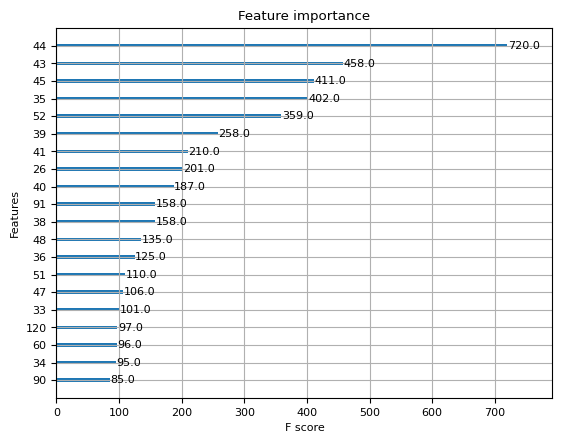

In [ ]:
best_model = random_search.best_estimator_

plot_importance(best_model, max_num_features=20)
plt.rcParams.update({'font.size': 8})
plt.show()

***ENSEMBLE - Bagging***


In [54]:
estimators=[('logreg', LogisticRegression()),('svm', SVC(probability=True)),('knn', KNeighborsClassifier()),('mlp', MLPClassifier()),('rf', RandomForestClassifier())]

ensemble = VotingClassifier(estimators, voting='soft',weights = [0.824474701941078,0.80,0.6920424733963937,0.8086634151147896 ,0.8423005037442113])

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(norm_scaled_filled_mean_random.iloc[:,25:], train_labels.iloc[:,1])
scores = []

for k, (train, test) in enumerate(kfold):
    ensemble.fit(norm_scaled_filled_mean_random.iloc[train, 25:], train_labels.iloc[train,1])
    y_pred_proba = ensemble.predict_proba(norm_scaled_filled_mean_random.iloc[test, 25:])
    score = roc_auc_score(train_labels.iloc[test,1], y_pred_proba[:, 1])
    scores.append(score)
    print(score)

print("Ensemble mean auc score for H1N1: ",np.mean(scores))
print("Ensemble max auc score for H1N1: ",np.max(scores))

0.8604128526498616
0.8385044695247483
0.8295645817825792
0.8492529116687764
0.8375568436773758
0.8387523189541433
0.846149531521033
0.8507339393375216
0.8417713504098034
0.8196177292706062
Ensemble mean auc score for H1N1:  0.8412316528796449
Ensemble max auc score for H1N1:  0.8604128526498616


In [ ]:
ensemble = VotingClassifier(estimators, voting='soft',weights = [0.8371034621578101 ,0.83,0.7209988929146537,0.8302123590982287,0.8419041867954911])

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(norm_scaled_filled_mean_random.iloc[:,25:], train_labels.iloc[:,2])
scores = []

for k, (train, test) in enumerate(kfold):
    ensemble.fit(norm_scaled_filled_mean_random.iloc[train, 25:], train_labels.iloc[train,2])
    y_pred_proba = ensemble.predict_proba(norm_scaled_filled_mean_random.iloc[test, 25:])
    score = roc_auc_score(train_labels.iloc[test,2], y_pred_proba[:, 1])
    scores.append(score)
    print(score)

print("Ensemble mean auc score for SEASONAL: ",np.mean(scores))
print("Ensemble max auc score for SEASONAL: ",np.max(scores))

0.8427552839317545
0.8438842954720103
0.8358258392913879
0.8529147335380814
0.8421265803959919
0.8470409894613978
0.8588380498290884
0.8465464061956487
0.8474698676991997
0.84349413477915
Ensemble mean auc score for SEASONAL:  0.8460896180593711
Ensemble max auc score for SEASONAL:  0.8588380498290884
